<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/pln_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolução Lista 4**

---

Audrey Emmely Rodrigues Vasconcelos

Karen Nayara Gomes da Silva

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# upando train_data e test_data_solution

Saving test_data_solution.txt to test_data_solution.txt
Saving train_data.txt to train_data.txt


In [ ]:
!pip install yellowbrick
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
import random
import time
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 2000)
df.columns = ['id', 'title', 'genre', 'description']
df2 = pd.read_csv('test_data_solution.txt', sep =':::', header = None, engine = 'python', nrows = 2000)
df2.columns = ['id', 'title', 'genre', 'description']

In [ ]:
dataset = pd.concat([df, df2], ignore_index=True)
dataset.drop(['id','genre'], axis=1, inplace=True)

In [ ]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) #remove todas as palavras que contêm números
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description) #retira espaços repetidos

In [ ]:
dataset['processed_description'] = dataset.description.apply(preprocess)

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(description):
    tokenized_text = nltk.word_tokenize(description, language='english')
    return " ".join([token for token in tokenized_text if token not in stop_words])

In [ ]:
dataset['processed_description'] = dataset.processed_description.apply(remove_stopwords)

In [ ]:
dataset

,title,description,processed_description
0,Oscar et la dame rose (2009),Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,Cupid (1997),A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...
...,...,...,...
3995,L'absence (2009/II),"Adama Diop is a successful scientist, living ...",adama diop successful scientist living paris y...
3996,Blood Circus (2017),"Sean ""THE KILLIN'"" Dillon was on top of the w...",sean killin dillon top world become decorated ...
3997,Gangsta Brown Master of the Game (2016),This DVD consists of 22 fictional characters ...,dvd consists fictional characters including mr...
3998,Treasure of the Golden Condor (1953),Jean-Paul rebels against his bondage to his u...,jeanpaul rebels bondage uncle marquis de st ma...


## Questão 1

Realize um comparativo entre os métodos LDA, SVD e NMF para realizar
modelagem de tópicos. Para cada método:

a) empiricamente, tente identificar uma quantidade de tópicos adequada para
seu problema. Exiba resultados que justifiquem a quantidade de tópicos
escolhida;

b) identifique as 5 palavras mais relevantes de cada tópico;

c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você
pode representar os tópicos por suas 5 palavras mais relevantes).

d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

In [ ]:
n_topics = 5
samples = dataset.sample(n=5)
samples.reset_index(inplace=True)
samples

,index,title,description,processed_description
0,1725,Irish Hearts (1927),"Sheila, a feisty Irish girl, loves Emmett, a ...",sheila feisty irish girl loves emmett somewhat...
1,3587,Crossbow Killer (2015),On a sweltering hot summer day in February 19...,sweltering hot summer day february unidentifia...
2,229,Through the Grapevine (2014),"In the 1990s, beloved Dookie primary school t...",beloved dookie primary school teacher peter mc...
3,847,Hasenherz (1987),"The thirteen year old Janni is depressed, bec...",thirteen year old janni depressed shes still l...
4,3997,Gangsta Brown Master of the Game (2016),This DVD consists of 22 fictional characters ...,dvd consists fictional characters including mr...


Utilizando TF-IDF como embbeding dos textos

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset.processed_description)

In [ ]:
for decomposition_algorithm in (LatentDirichletAllocation, TruncatedSVD, NMF):
    algorithm = decomposition_algorithm(n_components=n_topics)
    X_topics = algorithm.fit_transform(X)

    def get_top_words(topic, n, words, algorithm):
      sorted_idxs = np.argsort(algorithm.components_[topic])
      top_words = [words[i] for i in sorted_idxs]
      return [w for w in reversed(top_words[-n:])]

    print(f'Algoritmo: {decomposition_algorithm.__name__}')
    for i in range(n_topics):
        print(f'Tópico {i + i} -> {get_top_words(i, 5, tfidf.get_feature_names(), algorithm)}')
    print('\n')

    sample_topics = algorithm.transform(tfidf.transform(samples.processed_description))

    for i, sample in samples.iterrows():
        print(f'{sample.title}')
        print(sample.description[:70] + '...')
        print(sample_topics[i])
        print('\n')

Algoritmo: LatentDirichletAllocation
Tópico 0 -> ['life', 'one', 'film', 'new', 'young']
Tópico 2 -> ['fort', 'tango', 'iranian', 'de', 'salmon']
Tópico 4 -> ['new', 'one', 'two', 'girl', 'maria']
Tópico 6 -> ['de', 'vs', 'la', 'di', 'elnora']
Tópico 8 -> ['vs', 'de', 'rick', 'jeff', 'ptsd']


 Irish Hearts (1927) 
 Sheila, a feisty Irish girl, loves Emmett, a somewhat shady Irish boy...
[0.85914932 0.03520269 0.03525601 0.03519543 0.03519655]


 Crossbow Killer (2015) 
 On a sweltering hot summer day in February 1992, the unidentifiable b...
[0.6468196  0.28183735 0.02381939 0.02375849 0.02376517]


 Through the Grapevine (2014) 
 In the 1990s, beloved Dookie primary school teacher Peter McManus abr...
[0.90738559 0.02273131 0.02271985 0.02447404 0.02268921]


 Hasenherz (1987) 
 The thirteen year old Janni is depressed, because she's still a littl...
[0.8827493  0.02928705 0.02932241 0.02929075 0.02935049]


 Gangsta Brown Master of the Game (2016) 
 This DVD consists of 22 fictional

Melhor algoritmo: NMF


## Questão 2
Realize um agrupamento dos dados seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a
dimensão resultante dos dados projetados?

b) Aplique um algoritmo k-means nos dados projetados, usando o método elbow
para encontrar o valor de k ótimo.

c) Finalmente, aplique um algoritmo k-means nos dados originais (sem projeção
por PCA), usando o método elbow para encontrar o valor de k ótimo.

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
dataset['stemmed_text'] = dataset.processed_description.apply(lambda tokens: ' '.join([stemmer.stem(token) for token in tokens.split(' ')]))
X = tfidf.fit_transform(dataset.stemmed_text)

In [ ]:
Xproj = PCA(n_components=.95).fit_transform(X.toarray())

In [ ]:
Xproj.shape[1]

3311

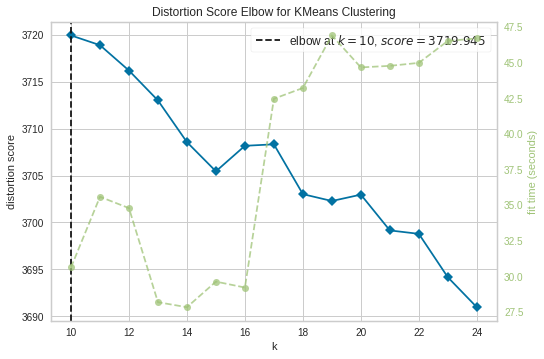

In [ ]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(Xproj)
visualizer.show()

In [ ]:
k = 10
kmeans_proj = KMeans(n_clusters=k).fit(Xproj)

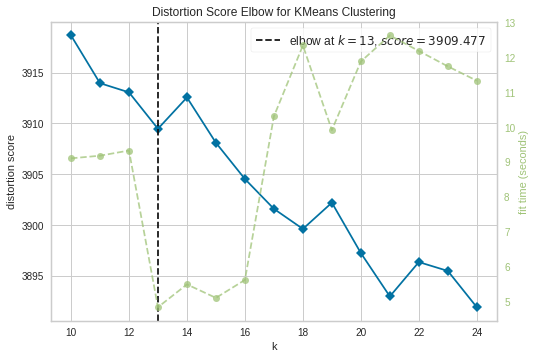

In [ ]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(X)
visualizer.show()

In [ ]:
k = 13
kmeans = KMeans(n_clusters=k).fit(X)

## Questão 3
Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP nos dados resultantes da questão 2b, e plote os gráficos das projeções resultantes, codificando as cores dos pontos de acordo com os grupos obtidos pelo k-means.

b) compare o tempo de execução e a qualidade visual da projeção dos 2 métodos
de projeção multidimensional, no resultado da questão 2b.

c) usando o método de projeção multidimensional que gerou melhores resultados no item anterior, calcule a projeção nos resultados da questão 2c e compare visualmente os resultados da questão 2b e 2c. Qual abordagem
funcionou melhor?

In [ ]:
palette = sns.hls_palette(13, l=.4, s=.9)

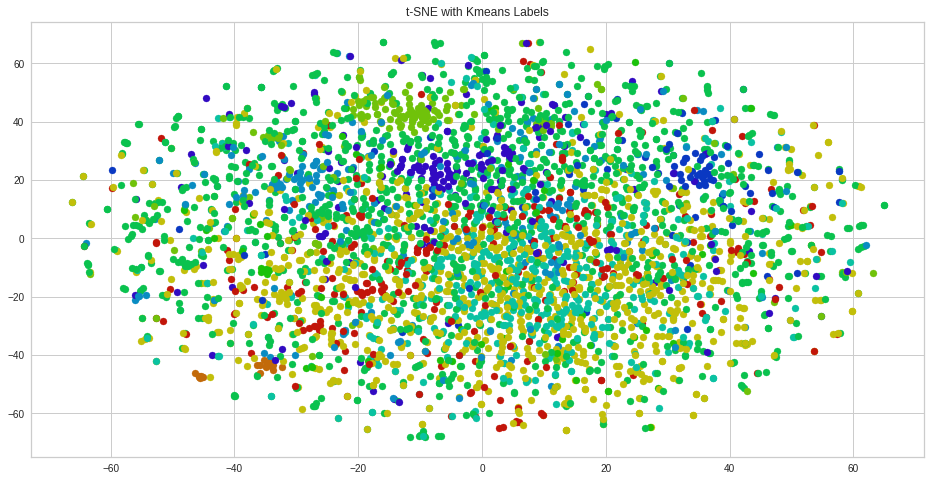

In [ ]:
start = time.time()

proj_tsne_embedded = TSNE().fit_transform(Xproj)
plt.figure(figsize=(16,8))
for coord, label in zip(proj_tsne_embedded, kmeans_proj.labels_):
    plt.scatter(x=coord[0],y=coord[1],c=[palette[label]])
plt.title('t-SNE with Kmeans Labels')
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

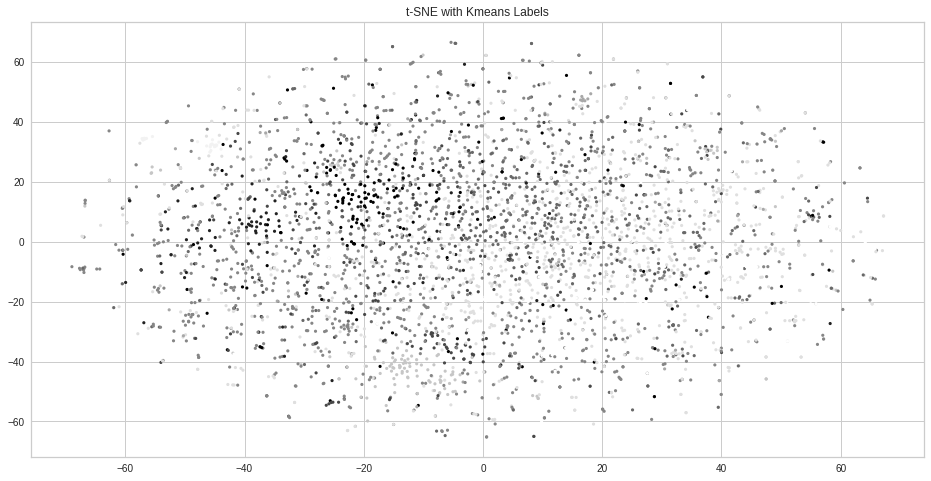

Duration: 44.01624083518982 seconds


In [ ]:
start = time.time()

proj_tsne_embedded = TSNE().fit_transform(Xproj)

plt.figure(figsize=(16,8))
plt.scatter(proj_tsne_embedded[:,0], proj_tsne_embedded[:,1], c=kmeans_proj.labels_, s=10, edgecolor='none')
plt.title('t-SNE with Kmeans Labels')
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

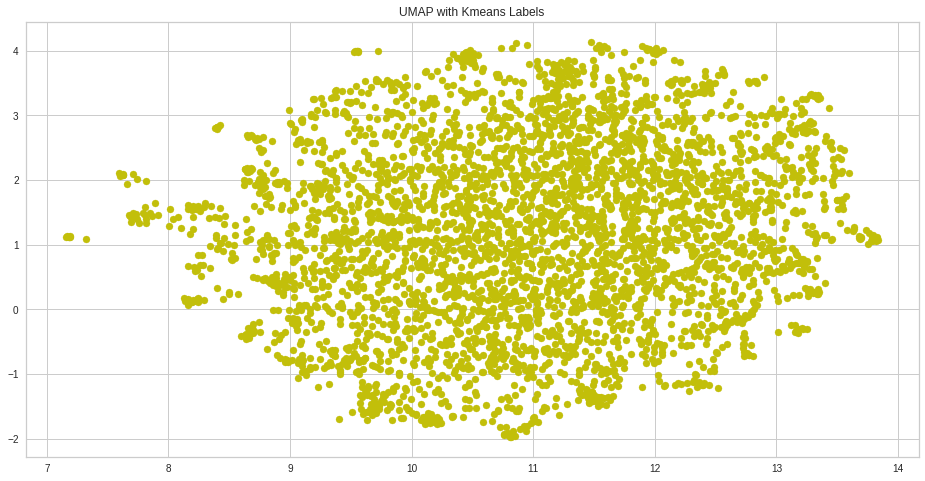

Duration: 112.18868446350098 seconds


In [ ]:
start = time.time()

proj_umap_embedded = umap.UMAP().fit_transform(Xproj)

plt.figure(figsize=(16,8))
for coord, l in zip(proj_umap_embedded, kmeans_proj.labels_):
    plt.scatter(x=coord[0],y=coord[1],c=[palette[label]])
plt.title('UMAP with Kmeans Labels')
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

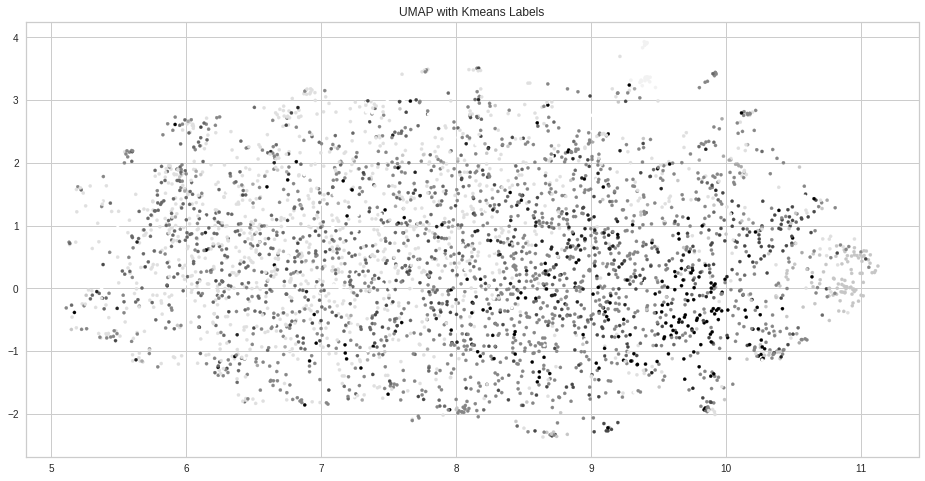

Duration: 69.90890455245972 seconds


In [ ]:
start = time.time()

embedding = umap.UMAP(random_state=12).fit_transform(Xproj)

plt.figure(figsize=(16,8))
plt.scatter(embedding[:,0], embedding[:,1], c=kmeans_proj.labels_, s=10)
plt.title('UMAP with Kmeans Labels')
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

O método de projeção multidimensional que gerou melhores resultados foi: t-SNE.

Aplicando em X, temos:

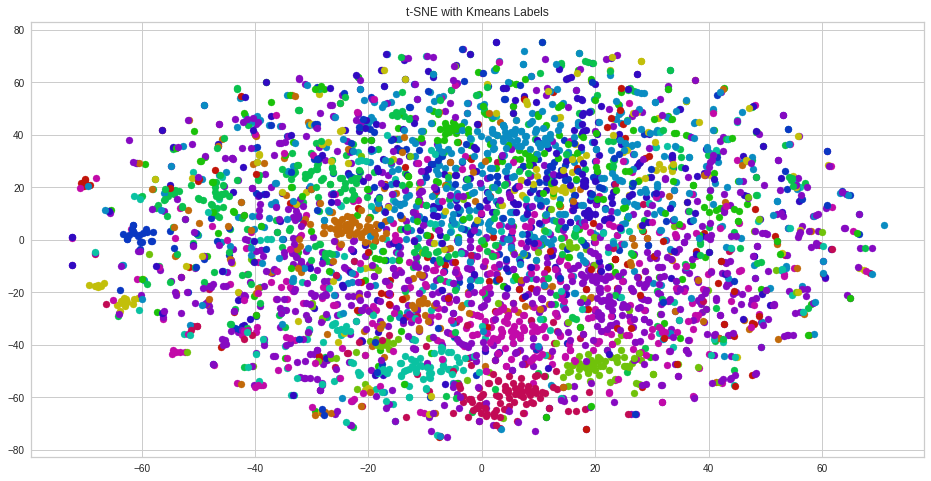

Duration: 193.62280321121216 seconds


In [ ]:
start = time.time()

tsne_embedded = TSNE().fit_transform(X)
plt.figure(figsize=(16,8))
for coord, label in zip(tsne_embedded, kmeans.labels_):
    plt.scatter(x=coord[0],y=coord[1],c=[palette[label]])
plt.title('t-SNE with Kmeans Labels')
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

O método de projeção multidimensional que gerou melhores resultados foi: UMAP.

Aplicando em X, temos:

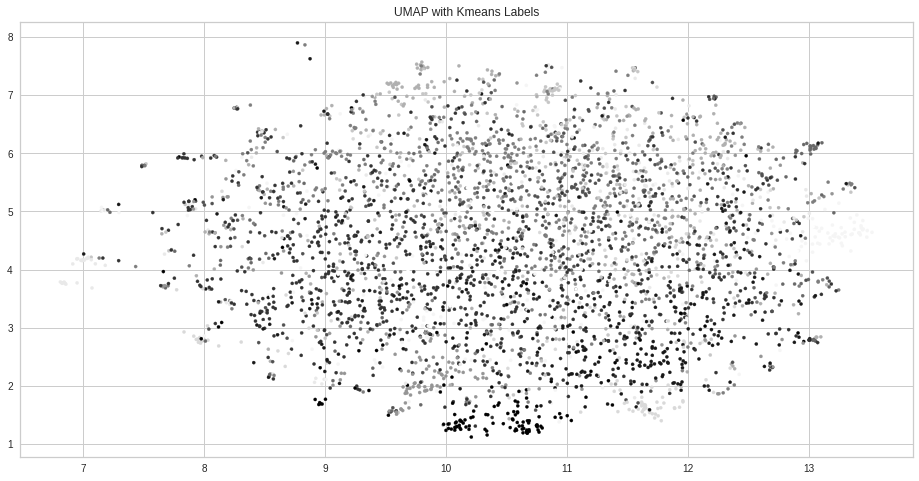

Duration: 27.97721529006958 seconds


In [ ]:
start = time.time()

umap_embedding = umap.UMAP(random_state=12).fit_transform(X)

plt.figure(figsize=(16,8))
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], c=kmeans.labels_, s=10)
plt.title('UMAP with Kmeans Labels')
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

**Referências**

[Introduction to Topic Modeling using Scikit-Learn](https://towardsdatascience.com/introduction-to-topic-modeling-using-scikit-learn-4c3f3290f5b9)

[PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[K-Means Clustering](https://towardsdatascience.com/k-means-clustering-8e1e64c1561c)

[Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)
